In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d basilb2s/language-detection

  0% 0.00/542k [00:00<?, ?B/s]
100% 542k/542k [00:00<00:00, 108MB/s]


In [3]:
import zipfile
zip= zipfile.ZipFile("/content/language-detection.zip","r")
zip.extractall("/content")
zip.close()

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [5]:
data = pd.read_csv("/content/Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [6]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

# Data Preprocess

In [7]:
X = data["Text"]
y = data["Language"]

In [8]:
# creating a list for appending the preprocessed text
data_list = []

In [9]:
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [10]:
data_list[:5]

[' nature  i  the broadest se se  is the  atural  physical  material world or u iverse.',
 ' nature  ca  refer to the phe ome a of the physical world  a d also to life i  ge eral.',
 'the study of  ature is a large  if  ot the o ly  part of scie ce.',
 'although huma s are part of  ature  huma  activity is ofte  u derstood as a separate category from other  atural phe ome a.',
 '[ ] the word  ature is borrowed from the old fre ch  ature a d is derived from the lati  word  atura  or  esse tial qualities  i  ate dispositio    a d i  a cie t times  literally mea t  birth .']

# Word Embedding

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [16]:
print("Accuracy is :",ac)

Accuracy is : 0.9748549323017408


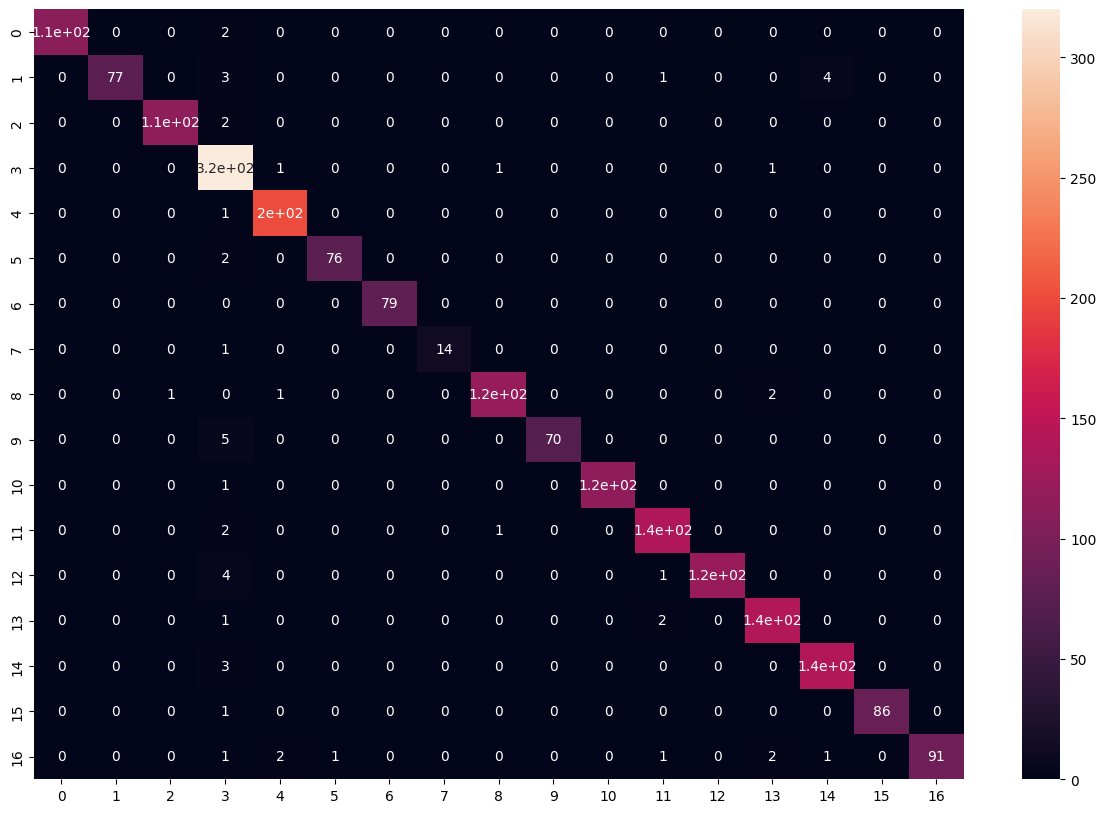

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

# Output

In [18]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     print("The langauge is in",lang[0]) # printing the language)

In [19]:
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The langauge is in Malayalam


In [20]:
predict("J'ai besoin d'une chambre double")

The langauge is in French


In [21]:
predict("Lass uns ein bisschen Spaß haben!")

The langauge is in German


In [23]:
import pickle
pickle.dump(model,open("trained_model.pkl","wb"))
pickle.dump(cv,open("cv.pkl","wb"))
